# Entrainement d'un modèle

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor

In [61]:
data_hotel = pd.read_csv("clean_data.csv")
data_hotel.head()

,lead_time,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,nb_persons,nb_nights,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,1.609764,0.839446,-0.161398,-1.125010,-0.794241,0.100908,0.008417,-0.060132,-0.100847,-0.242851,1.568506,-1.338085,1.0
1,-0.937707,1.166097,-0.161398,0.117871,0.442749,0.100908,1.190305,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,1.0
2,-0.984236,-1.773767,-0.161398,-1.274108,-0.794241,-1.492329,0.008417,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0
3,1.458545,-0.793812,-0.161398,-0.081324,-0.794241,0.100908,-0.582528,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0
4,-0.437518,-1.120464,-0.161398,-0.245332,-0.794241,0.100908,-0.582528,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0


In [62]:
X = data_hotel.drop(['booking_status_Not_Canceled'], axis=1)
y = data_hotel['booking_status_Not_Canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Decision tree

Accuracy sur les données de test :  0.86
Score moyen par validation croisée :  0.85
Précision :  0.91
Rappel :  0.88


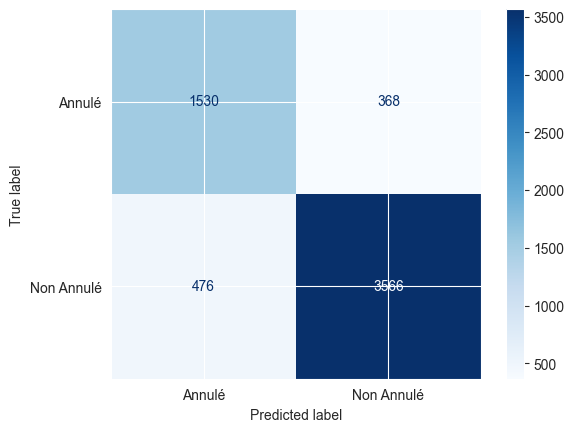

Profondeur de : 32


In [63]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy sur les données de test : ", np.round(tree.score(X_test, y_test),2))
print("Score moyen par validation croisée : ", np.round(np.mean(cross_val_score(tree, X, y, cv=5)), 2))
y_pred = tree.predict(X_test)

print("Précision : ", np.round(precision_score(y_test, y_pred, average='binary', pos_label=1),2))
print("Rappel : ", np.round(recall_score(y_test, y_pred, average='binary', pos_label=1),2))
# Affichage plus visuel
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Annulé', 'Non Annulé'])
plt.show()
print('Profondeur de :', tree.tree_.max_depth)


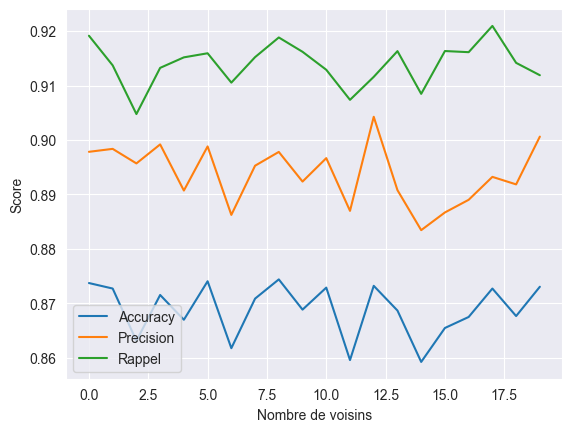

Score maximum pour p = 9


In [64]:
X = data_hotel.drop(['booking_status_Not_Canceled'], axis=1)
y = data_hotel['booking_status_Not_Canceled']

accuracy_scores = []
precision_scores = []
recall_scores = []
k_range = range(0,20)


for i in k_range:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    tree_max_depth_3 = DecisionTreeClassifier(max_depth=13)

    tree_max_depth_3.fit(X_train, y_train)

    y_pred = tree_max_depth_3.predict(X_test)

    accuracy_scores.append(np.round(tree_max_depth_3.score(X_test, y_test),5))
    # print("Accuracy : ", np.round(tree_max_depth_3.score(X_test, y_test),5))

    precision_scores.append(np.round(precision_score(y_test, y_pred, average='binary', pos_label=1),5))
    # print("Précision : ", np.round(precision_score(y_test, y_pred, average='binary', pos_label=1),5))

    recall_scores.append(np.round(recall_score(y_test, y_pred, average='binary', pos_label=1),5))
    # print("Rappel : ", np.round(recall_score(y_test, y_pred, average='binary', pos_label=1),5))




plt.plot(k_range, accuracy_scores, label='Accuracy')
plt.plot(k_range, precision_scores, label='Precision')
plt.plot(k_range, recall_scores, label='Rappel')
plt.xlabel('Nombre de voisins')
plt.ylabel('Score')
plt.legend()
plt.show()

prof_max = np.argmax(accuracy_scores) + 1
print("Score maximum pour p =", prof_max)

# sauvegarde des scores
dt_best_accuracy = accuracy_scores[prof_max-1]
dt_best_pred = precision_scores[prof_max-1]
dt_best_recall = recall_scores[prof_max-1]



Meilleur accuracy:  0.8744
Meilleure précision : 0.8978
Meilleur rappel:  0.8744


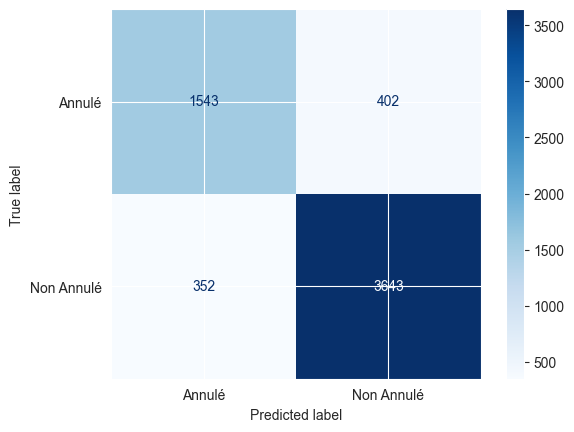

In [65]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Annulé', 'Non Annulé'])
disp.plot(cmap='Blues')
print("Meilleur accuracy: ", round(dt_best_accuracy, 4))
print("Meilleure précision :", round(dt_best_pred,4))
print("Meilleur rappel: ", round(dt_best_accuracy,4))